In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import seaborn as sns

In [2]:
df=pd.read_excel("random_forest_dataset.xlsx")
df.head()

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13,4,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13,1,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13,4,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A


In [3]:
df.isna().sum()
df.dropna()

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13,4,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13,1,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13,4,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,114,1RV21MC119,Y S KIRAN KUMAR,Text Summarization Using NLP,92,18.4,90.0,36.0,94,18.8,13,4,35.8,90.2,S
113,115,1RV21MC120,YATHISH L,Immersive Virtual Reality walkthrough of MCA D...,100,20.0,100.0,40.0,100,20.0,15,5,40.0,100.0,S
114,116,1RV20MC031,KAVITHA M,IoT - Gateway dashboard for Greenhouse Automat...,87,17.4,92.0,36.8,92,18.4,14,5,37.4,91.6,S
115,117,1RD19MCA38,VIVEK KUMAR,Face Attendance System With Real Time Database,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,F


In [36]:
x=df.drop(["Sl No","USN","Name","Title","Grade"],axis=1)
y=df["Grade"]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=5)

In [38]:
param_grid={'n_estimators':[100,200,300],'max_depth':[None,10,20],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}

In [39]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
grid_search.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [41]:
best_parameter = grid_search.best_params_
best_parameter

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [42]:
rf_classifier=RandomForestClassifier(**best_parameter,random_state=22)
model.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, random_state=5)

In [43]:
y_pred = model.predict(x_test)
y_pred

array(['A', 'S', 'B', 'A', 'B', 'A', 'A', 'S', 'S', 'S', 'A', 'A', 'A',
       'B', 'A', 'S', 'S', 'S', 'B', 'A', 'A', 'A', 'A', 'A', 'S', 'S',
       'B', 'B', 'B', 'A'], dtype=object)

In [44]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [45]:
conf_matrix = confusion_matrix(y_test,y_pred)
x_test

,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
37,89,17.8,86.0,34.4,78,15.6,15,5,35.6,87.8
46,91,18.2,94.0,37.6,96,19.2,15,5,39.2,95.0
28,73,14.6,76.0,30.4,75,15.0,10,0,25.0,70.0
10,82,16.4,79.0,31.6,84,16.8,13,5,34.8,82.8
116,77,15.4,80.0,32.0,81,16.2,12,0,28.2,75.6
94,88,17.6,82.0,32.8,89,17.8,13,5,35.8,86.2
23,89,17.8,86.0,34.4,91,18.2,13,4,35.2,87.4
63,93,18.6,90.0,36.0,92,18.4,14,4,36.4,91.0
69,100,20.0,100.0,40.0,99,19.8,14,4,37.8,97.8
72,95,19.0,93.0,37.2,95,19.0,14,5,38.0,94.2


<Axes: >

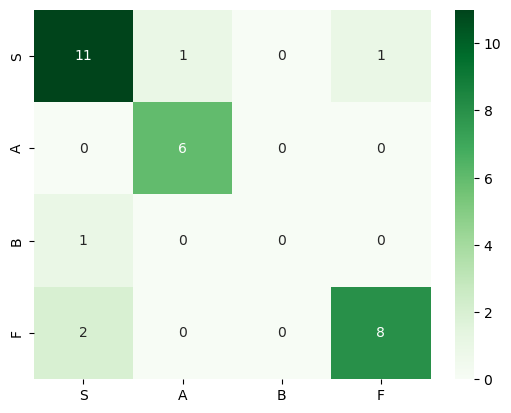

In [46]:
className = ['S','A','B','F']
sns.heatmap(conf_matrix,xticklabels=className,yticklabels=className,cmap='Greens',annot=True)

Text(0, 0.5, 'Features')

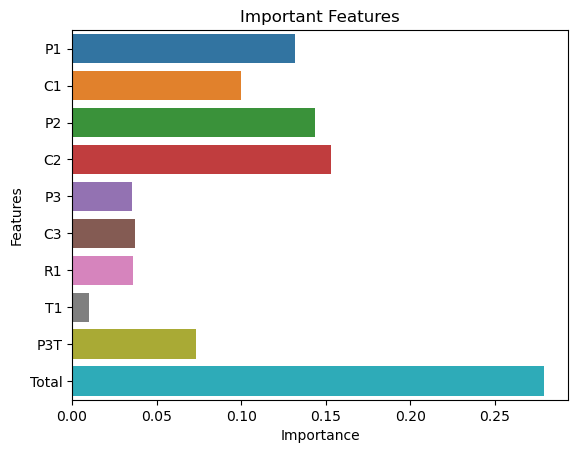

In [47]:
important_feature = model.feature_importances_
sns.barplot(x = important_feature, y=x.columns)
plt.title("Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")

In [50]:
result=model.predict([[68,13,67.0,26.8,75,15.0,10,0,25.0,64.5]])
result

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)